In [6]:
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
from PIL import Image
import numpy as np
# Add the parent directory to the system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

### The cropper fcns

In [7]:
def crop_rgb_img(input_img):
    nonwhite_pix = (input_img != 255).any(-1)
    nonwhite_row = nonwhite_pix.any(1)
    nonwhite_col = nonwhite_pix.any(0)
    return input_img[nonwhite_row][:, nonwhite_col]

def crop_rgba_img(input_img):
    nonwhite_pix = (input_img[:,:,:3]!= 255).any(-1)
    nonwhite_row = nonwhite_pix.any(1)
    nonwhite_col = nonwhite_pix.any(0)
    cropped_screenshot = input_img[nonwhite_row][:, nonwhite_col]
    nonwhite_pix = (cropped_screenshot[:,:,:3]!= 255).any(-1)
    white_pix = (cropped_screenshot[:,:,:3]== 255).all(-1)
    cropped_screenshot[white_pix] = [255, 255, 255, 0]
    return cropped_screenshot

### Decide which agent to crop images of and import images

In [8]:
high_level_agent_name = "locked_conv" #"unlocked", "locked_conv" or "random"
input_path = os.path.join(parent_dir, 'plotting', 'replotting_results', high_level_agent_name,'plots')

# Get all the images at the input path
name_img_dict = {}
for img_path in glob.glob(input_path + '/*.png'):
    name = img_path.split('\\')[-1].split('.')[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    name_img_dict[name] = img

### Example of how it works on one img:

Resolution and channels original image:  (4000, 4000, 3)
Resolution and channels after crop:  (3314, 3501, 3)


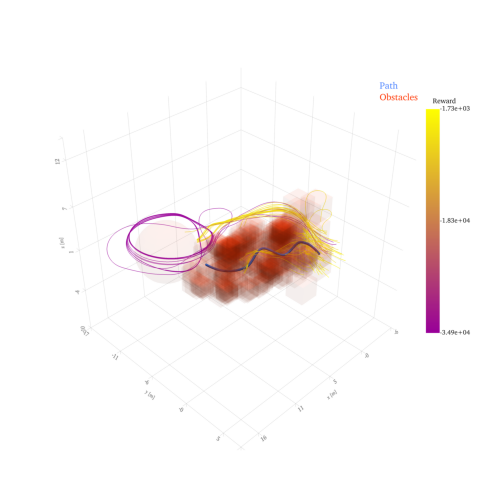

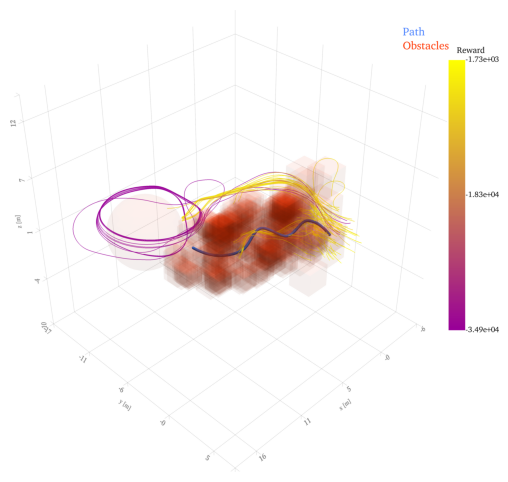

In [9]:
scene_img = name_img_dict[f'{high_level_agent_name}_cave_multiplot']

#display the original image
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.axis("off")
ax.imshow(scene_img)
print("Resolution and channels original image: ",scene_img.shape)

#Crop the image
cropped_scene_img = crop_rgb_img(scene_img)

# After cropping
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.axis("off")
ax.imshow(cropped_scene_img)
print("Resolution and channels after crop: ",cropped_scene_img.shape)

### Cropping all imgs in the inputpath and storing in a "neighbour folder"

In [10]:
os.makedirs(os.path.join(parent_dir, 'plotting', 'replotting_results', high_level_agent_name, 'cropped_plots'), exist_ok=True)
for name, img in name_img_dict.items():
    cropped_img = crop_rgb_img(img)

    #Save the cropped image
    cropped_img = Image.fromarray(cropped_img)
    output_path = os.path.join(parent_dir, 'plotting', 'replotting_results', high_level_agent_name, 'cropped_plots', f'cropped_{name}.png')
    cropped_img.save(output_path)